# Get content form HTML

Importing Library

In [ ]:
import requests

Get content from the web

In [ ]:
page = requests.get("https://www.worldometers.info/coronavirus")

Check Status Code (check at : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

In [ ]:
page.status_code

200

Cek konten yang telah di download 

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
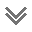

In [ ]:
print(page.content)

# Start parsing the HTML content

Install Library Beautifulsoup

In [ ]:
pip install beautifulsoup4

Import Library Beautifulsoup

In [ ]:
from bs4 import BeautifulSoup

Parsing the HTML document via the BeautifulSoup object using "lxml" parser

In [ ]:
#Start Parsing using "lxml" parser
soup = BeautifulSoup(page.content, 'lxml')

Cek Hasil Parsing yang telah dilakukan

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
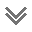

In [ ]:
print(soup)

Percantik format hasil parsing dengan prettify (opsional)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
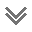

In [ ]:
# Prettify format from parsing
print(soup.prettify())

# Inspect Element form Web and extract the content

Setelah menginspeksi element dari web world do meter didapatkan : 

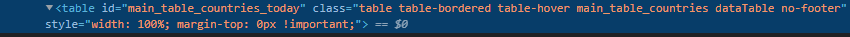

In [ ]:
# Search the table and extract the table
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

Print the table

In [ ]:
print(table)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

# Get the text from extracted table

get the text from 'tr' tag (tr=table row)

In [ ]:
rows = table.find_all("tr", attrs={"style": ""})

melakukan iterasi untuk data dibawah tr 

In [ ]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

In [ ]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests'],
 ['World',
  '440,554,009',
  '+279,104',
  '5,992,507',
  '+236',
  '372,992,386',
  '+58,807',
  '61,569,116',
  '75,893',
  '56,519',
  '768.8',
  ''],
 ['1',
  'USA',
  '80,766,725',
  '',
  '979,725 ',
  '',
  '53,945,789',
  '',
  '25,841,211',
  '7,161',
  '241,649',
  '2,931'],
 ['2',
  'India',
  '42,944,761',
  '',
  '514,419 ',
  '',
  '42,343,229',
  '',
  '87,113',
  '8,944',
  '30,619',
  '367'],
 ['3',
  'Brazil',
  '28,842,160',
  '',
  '650,052 ',
  '',
  '26,668,010',
  '',
  '1,524,098',
  '8,318',
  '134,104',
  '3,022'],
 ['4',
  'France',
  '22,840,306',
  '',
  '138,762 ',
  '',
  '21,233,516',
  '',
  '1,468,028',
  '2,484',
  '348,634',
  '2,118'],
 ['5',
  'UK',
  '19,029,321',
  '',
  '161,704 ',
  '',
  '17,537,214',
  '',
  '1,330,403'

# Coverting list to dataframe using Pandas

Import library

In [ ]:
import pandas as pd

In [ ]:
dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header

In [ ]:
dt.head()

# Country,Other  ... Tot Cases/1M pop Deaths/1M pop
0  World   440,554,009  ...            768.8              
1      1           USA  ...          241,649         2,931
2      2         India  ...           30,619           367
3      3        Brazil  ...          134,104         3,022
4      4        France  ...          348,634         2,118

[5 rows x 12 columns]

Delete the world data and "#" Column

*   List item

*   List item
*   List item


*   List item



In [ ]:
df =  dt.drop(labels=0,axis=0).drop(columns="#")

In [ ]:
df=df.drop(df.index[221])

#menampilkan 5 negara dengan kasus harian terbanyak

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df2=df[["Country,Other","NewCases"]]

In [ ]:
df2type=df2.dtypes
print(df2type)

Country,Other    object
NewCases         object
dtype: object


In [ ]:
df2['NewCases']=df2['NewCases'].str.replace(',','',regex=True)
df2['NewCases']=df2['NewCases'].str.replace('+','',regex=True)
df2 = df2.replace(r'^\s*$', np.nan, regex=True)
df2.sort_values(by=['NewCases'],ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Country,Other NewCases
46         Pakistan      768
129        Suriname       59
30        Australia    32200
61          Bolivia      263
33         Thailand    23618
..              ...      ...
216    Cook Islands      NaN
217           Samoa      NaN
218    Vatican City      NaN
219         Vanuatu      NaN
220  Western Sahara      NaN

[221 rows x 2 columns]

In [ ]:
df2['NewCases'] = pd.to_numeric(df2['NewCases'])
df2.dtypes

Country,Other     object
NewCases         float64
dtype: object

In [ ]:
df2['NewCases'].sort_values(ascending=False)

21     198802.0
30      32200.0
33      23618.0
110     23180.0
46        768.0
         ...   
216         NaN
217         NaN
218         NaN
219         NaN
220         NaN
Name: NewCases, Length: 221, dtype: float64

In [ ]:
df2=df2.sort_values(by=['NewCases'],ascending=False)
df2.head()

Country,Other  NewCases
21       S. Korea  198802.0
30      Australia   32200.0
33       Thailand   23618.0
110   New Zealand   23180.0
46       Pakistan     768.0

In [ ]:
df2=df2.transpose()
df2=df2.head()

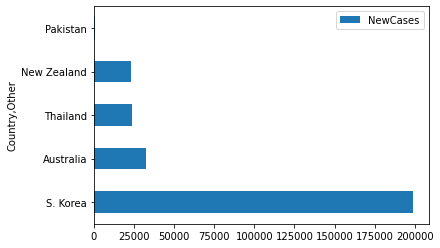

In [ ]:
df2.plot(x ='Country,Other', y='NewCases', kind = 'barh')